# Diabetes care analysis

## Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('data/diabetic_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Data Cleaning

### Replace "?" with NaN

In [3]:
def replace_question_mark(df):
    return df.replace('?', np.nan)

df = replace_question_mark(df)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Explore missing values

In [4]:
for col in df.columns:
    missing = df[col].isnull().sum()
    if missing > 0:
        print(f'{col}: {missing} missing values')
        if missing < 0.015 * df.shape[0]:
            df = df.dropna(subset=[col])

race: 2273 missing values
weight: 98569 missing values
payer_code: 40256 missing values
medical_specialty: 49949 missing values
diag_1: 21 missing values
diag_2: 357 missing values
diag_3: 1144 missing values
max_glu_serum: 94981 missing values
A1Cresult: 83645 missing values


In [5]:
for col in df.columns:
    missing = df[col].isnull().sum()
    if missing > 0:
        print(f'{col}: {missing} missing values')

race: 2191 missing values
weight: 97073 missing values
payer_code: 39455 missing values
medical_specialty: 49482 missing values
max_glu_serum: 94981 missing values
A1Cresult: 83645 missing values


In [6]:
cols_to_examine = ["weight", "payer_code", "medical_specialty", "max_glu_serum", "A1Cresult"]
for col in cols_to_examine:
    print(df[col].value_counts())   

weight
[75-100)     1332
[50-75)       885
[100-125)     623
[125-150)     145
[25-50)        93
[0-25)         44
[150-175)      35
[175-200)      11
>200            3
Name: count, dtype: int64
payer_code
MC    32223
HM     6197
SP     4892
BC     4569
MD     3473
CP     2495
UN     2366
CM     1932
OG     1020
PO      585
DM      536
CH      145
WC      130
OT       94
MP       79
SI       52
FR        1
Name: count, dtype: int64
medical_specialty
InternalMedicine                    14384
Emergency/Trauma                     7496
Family/GeneralPractice               7299
Cardiology                           5321
Surgery-General                      3023
                                    ...  
Speech                                  1
Pediatrics-InfectiousDiseases           1
Perinatology                            1
Neurophysiology                         1
Surgery-PlasticwithinHeadandNeck        1
Name: count, Length: 72, dtype: int64
max_glu_serum
Norm    2558
>200    1467
>300  

In [7]:
df = df.drop(columns=["weight"])

### Fix A1Cresult and max_glu_serum values - NaN to "None"

In [8]:
df["A1Cresult"] = df["A1Cresult"].replace(np.nan, "None")
df["max_glu_serum"] = df["max_glu_serum"].replace(np.nan, "None")

df["A1Cresult"].value_counts()
df["max_glu_serum"].value_counts()

max_glu_serum
None    94981
Norm     2558
>200     1467
>300     1238
Name: count, dtype: int64

### Filling missing values

### Filling missing race values

In [9]:
df["race"] = df["race"].fillna(df["race"].mode()[0])

### Drop invalid gender values

In [10]:
df = df[df["gender"] != "Unknown/Invalid"]
df["gender"].value_counts()

gender
Female    53922
Male      46319
Name: count, dtype: int64

### Filling missing payer_code and medical_specialty values

In [11]:
df["payer_code"] = df["payer_code"].fillna("Unknown")
df["medical_specialty"] = df["medical_specialty"].fillna("Unknown")

In [12]:
df["payer_code"].value_counts()

payer_code
Unknown    39454
MC         32223
HM          6197
SP          4892
BC          4569
MD          3473
CP          2493
UN          2366
CM          1932
OG          1020
PO           585
DM           536
CH           145
WC           130
OT            94
MP            79
SI            52
FR             1
Name: count, dtype: int64

In [13]:
df["medical_specialty"].value_counts()

medical_specialty
Unknown                             49480
InternalMedicine                    14384
Emergency/Trauma                     7496
Family/GeneralPractice               7299
Cardiology                           5320
                                    ...  
Psychiatry-Addictive                    1
Perinatology                            1
Neurophysiology                         1
Pediatrics-InfectiousDiseases           1
Surgery-PlasticwithinHeadandNeck        1
Name: count, Length: 73, dtype: int64

In [14]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,Unknown,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,Unknown,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,Unknown,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,Unknown,...,No,Steady,No,No,No,No,No,No,Yes,>30


## Merge mapping IDs

### Load mapping datasets

In [15]:
admission_type_id = pd.read_csv('data/admission_type.csv')
admission_type_id

,admission_type_id,admission_type
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [16]:
discharge_disposition_id = pd.read_csv('data/discharge_disposition.csv')
discharge_disposition_id

,discharge_disposition_id,discharge_disposition
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


In [17]:
admission_source_id = pd.read_csv('data/admission_source.csv')
admission_source_id

,admission_source_id,admission_source
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


### Merge mapping datasets

In [18]:
df["admission_type_id"] = df["admission_type_id"].astype(str)
df["discharge_disposition_id"] = df["discharge_disposition_id"].astype(str)
df["admission_source_id"] = df["admission_source_id"].astype(str)

In [19]:
admission_type_id["admission_type_id"] = admission_type_id["admission_type_id"].astype(str)
discharge_disposition_id["discharge_disposition_id"] = discharge_disposition_id["discharge_disposition_id"].astype(str)
admission_source_id["admission_source_id"] = admission_source_id["admission_source_id"].astype(str)

In [20]:
df = df.merge(admission_type_id, how='left', left_on='admission_type_id', right_on='admission_type_id')
df = df.merge(discharge_disposition_id, how='left', left_on='discharge_disposition_id', right_on='discharge_disposition_id')
df = df.merge(admission_source_id, how='left', left_on='admission_source_id', right_on='admission_source_id')

df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type,discharge_disposition,admission_source
0,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,Unknown,...,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
1,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,...,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room
2,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,Unknown,...,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
3,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,Unknown,...,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
4,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,Unknown,...,No,No,No,No,No,Yes,>30,Urgent,Discharged to home,Clinic Referral


### Drop the original columns

In [21]:
df = df.drop(columns=["admission_type_id", "discharge_disposition_id", "admission_source_id"])

In [22]:
df.head()

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type,discharge_disposition,admission_source
0,149190,55629189,Caucasian,Female,[10-20),3,Unknown,Unknown,59,0,...,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
1,64410,86047875,AfricanAmerican,Female,[20-30),2,Unknown,Unknown,11,5,...,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room
2,500364,82442376,Caucasian,Male,[30-40),2,Unknown,Unknown,44,1,...,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
3,16680,42519267,Caucasian,Male,[40-50),1,Unknown,Unknown,51,0,...,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
4,35754,82637451,Caucasian,Male,[50-60),3,Unknown,Unknown,31,6,...,No,No,No,No,No,Yes,>30,Urgent,Discharged to home,Clinic Referral


### Explore the new columns

In [23]:
df["admission_type"].value_counts()

admission_type
Emergency        53230
Elective         18544
Urgent           18203
Not Available     4719
Not Mapped         315
Trauma Center       21
Newborn             10
Name: count, dtype: int64

In [24]:
df["admission_type"] = df["admission_type"].fillna("Unknown")

In [25]:
df["discharge_disposition"].value_counts()

discharge_disposition
Discharged to home                                                                                           59003
Discharged/transferred to SNF                                                                                13897
Discharged/transferred to home with home health service                                                      12830
Discharged/transferred to another short term hospital                                                         2115
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1981
Expired                                                                                                       1640
Discharged/transferred to another type of inpatient care institution                                          1167
Not Mapped                                                                                                     956
Discharged/transferred to ICF                             

In [26]:
df["discharge_disposition"] = df["discharge_disposition"].fillna("Unknown")

In [27]:
df["admission_source"].value_counts()

admission_source
Emergency Room                                               56797
Physician Referral                                           29035
Transfer from a hospital                                      3144
Transfer from another health care facility                    2144
Clinic Referral                                               1092
Transfer from a Skilled Nursing Facility (SNF)                 852
HMO Referral                                                   179
Not Mapped                                                     161
Not Available                                                  112
Court/Law Enforcement                                           15
Transfer from hospital inpt/same fac reslt in a sep claim       12
Transfer from critial access hospital                            8
Extramural Birth                                                 2
Normal Delivery                                                  2
Transfer from Ambulatory Surgery Center      

In [28]:
df["admission_source"] = df["admission_source"].fillna("Unknown")

## Exploratory Data Analysis (EDA)

### Demography of the dataset

#### Demography of the dataset

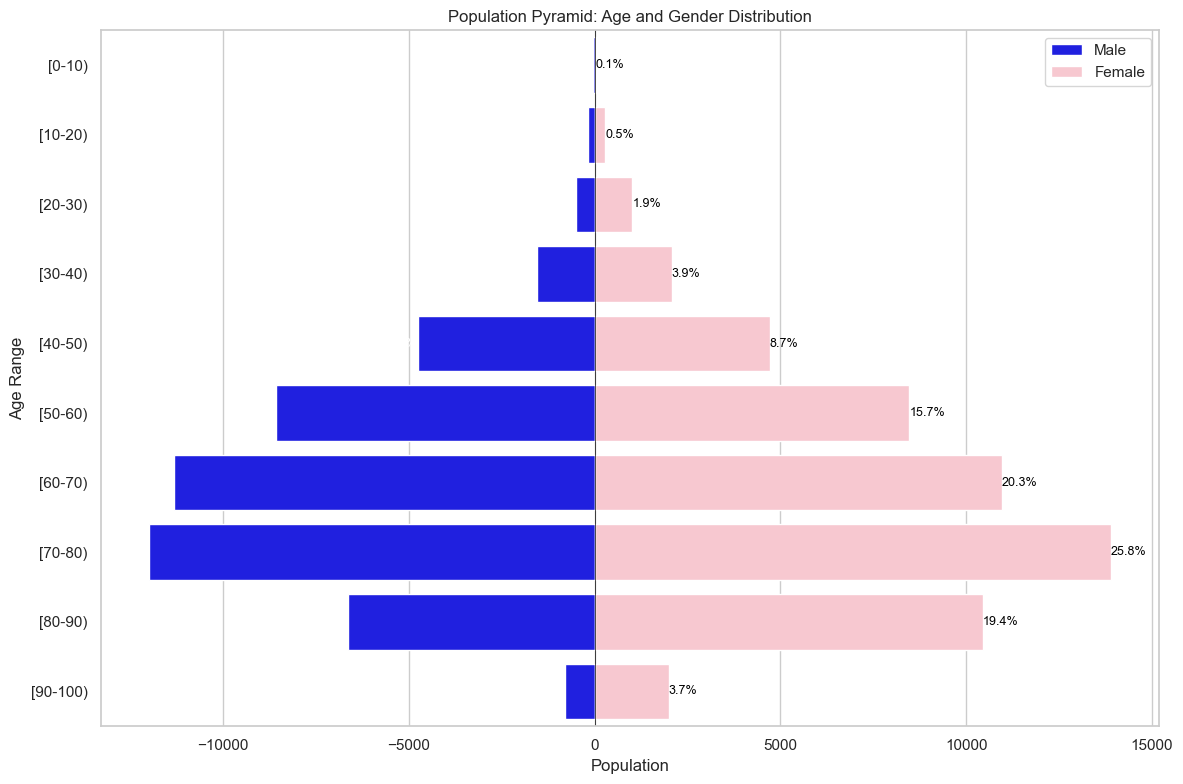

In [29]:
population_data = df.groupby(['age', 'gender']).size().unstack()
population_data = population_data.reindex(columns=['Male', 'Female'], fill_value=0)
population_data['Male'] = -population_data['Male']
age_categories = population_data.index.tolist()

male_percentage = (population_data['Male'] / population_data['Male'].sum()) * 100
female_percentage = (population_data['Female'] / population_data['Female'].sum()) * 100

plt.figure(figsize=(12, 8))
sns.barplot(x=population_data['Male'], y=age_categories, color='blue', label='Male')
sns.barplot(x=population_data['Female'], y=age_categories, color='pink', label='Female')

for i, age_group in enumerate(age_categories):
    plt.text(population_data['Male'].iloc[i], i, f"{abs(male_percentage.iloc[i]):.1f}%", va='center', ha='right', fontsize=9, color='white')
    plt.text(population_data['Female'].iloc[i], i, f"{female_percentage.iloc[i]:.1f}%", va='center', ha='left', fontsize=9, color='black')

plt.title('Population Pyramid: Age and Gender Distribution')
plt.xlabel('Population')
plt.ylabel('Age Range')
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

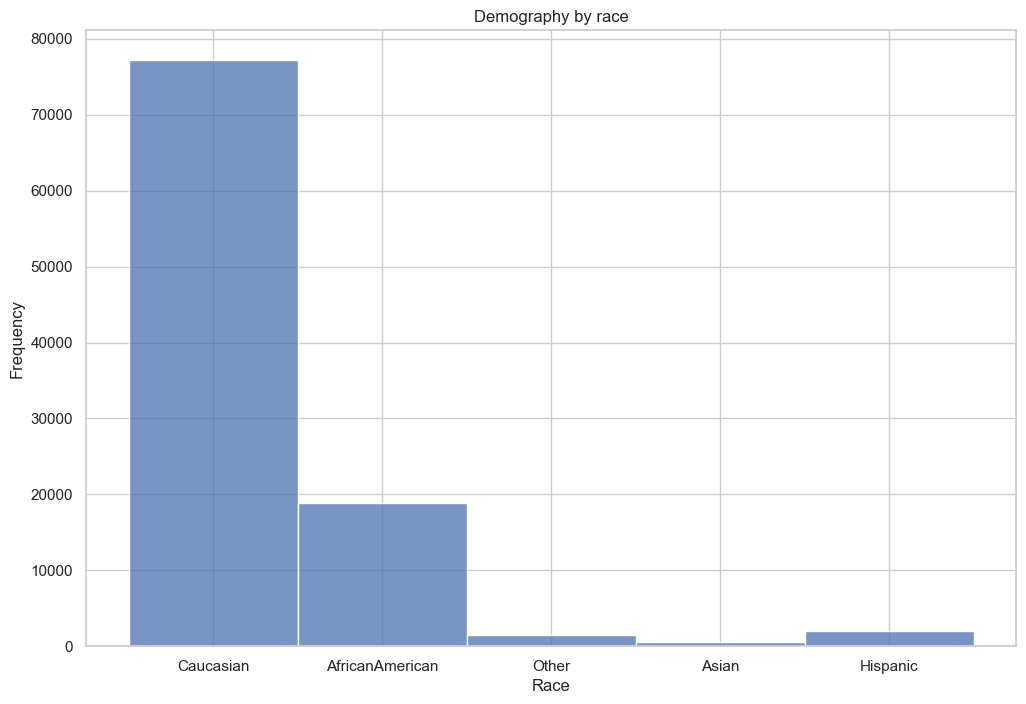

In [30]:
plt.figure(figsize=(12, 8))
sns.histplot(df['race'], bins=5, kde=False)
plt.title('Demography by race')
plt.xlabel("Race")
plt.ylabel("Frequency")
plt.show()

### Univariate Analysis

#### Time in hospital

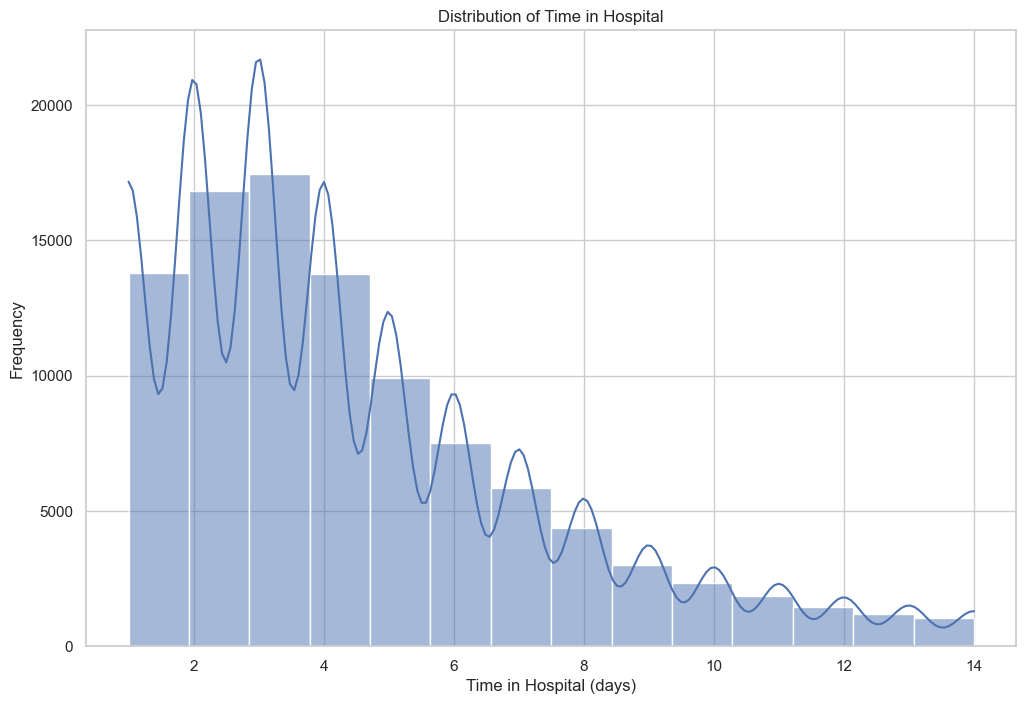

In [31]:
plt.figure(figsize=(12, 8))
sns.histplot(df['time_in_hospital'], bins=14, kde=True)
plt.title('Distribution of Time in Hospital')
plt.xlabel('Time in Hospital (days)')
plt.ylabel('Frequency')
plt.show()

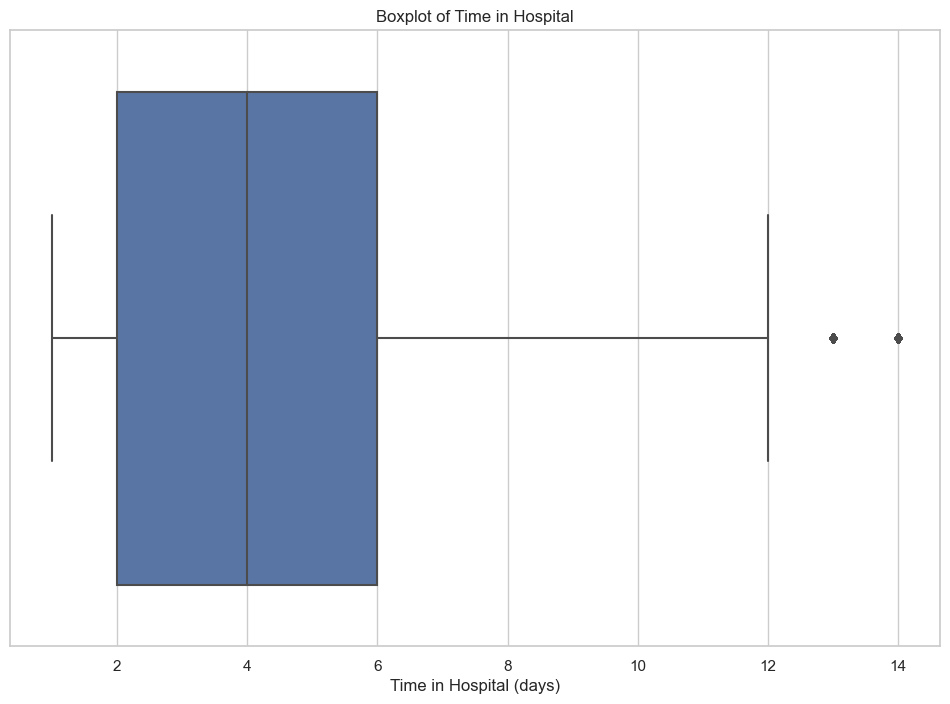

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['time_in_hospital'])
plt.title('Boxplot of Time in Hospital')
plt.xlabel('Time in Hospital (days)')
plt.show()

#### Number of lab procedures

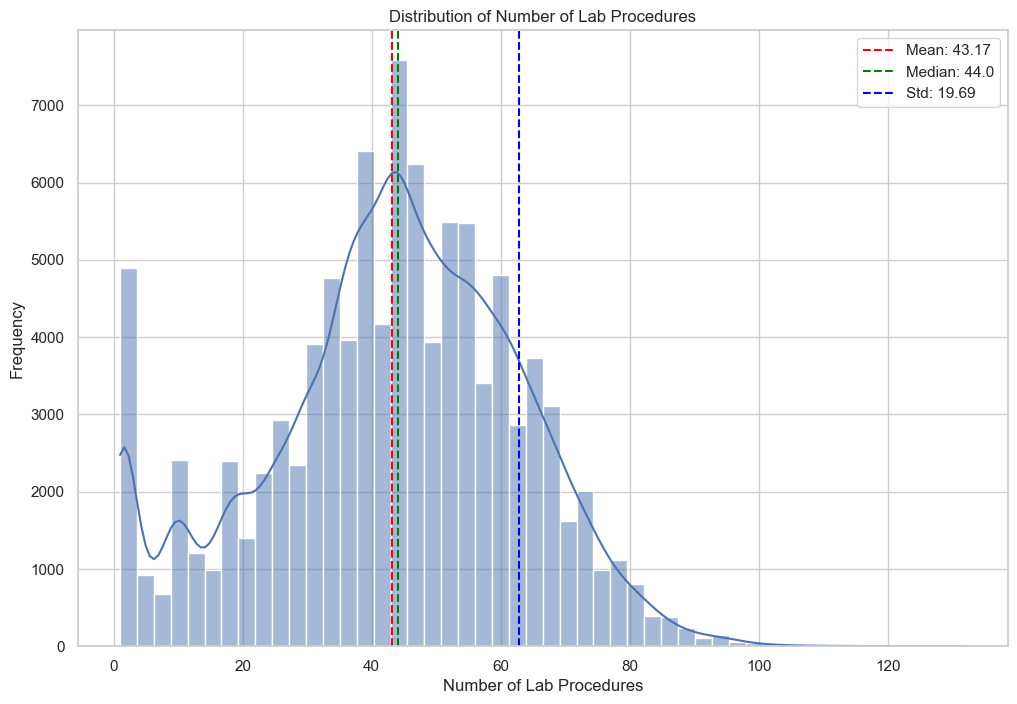

In [33]:
mean = df['num_lab_procedures'].mean()
median = df['num_lab_procedures'].median()
std = df['num_lab_procedures'].std()

plt.figure(figsize=(12, 8))
sns.histplot(df['num_lab_procedures'], bins=50, kde=True)
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='--', label=f'Median: {median}')
plt.axvline(mean + std, color='blue', linestyle='--', label=f'Std: {std:.2f}')
plt.title('Distribution of Number of Lab Procedures')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Frequency')
plt.legend()
plt.show()

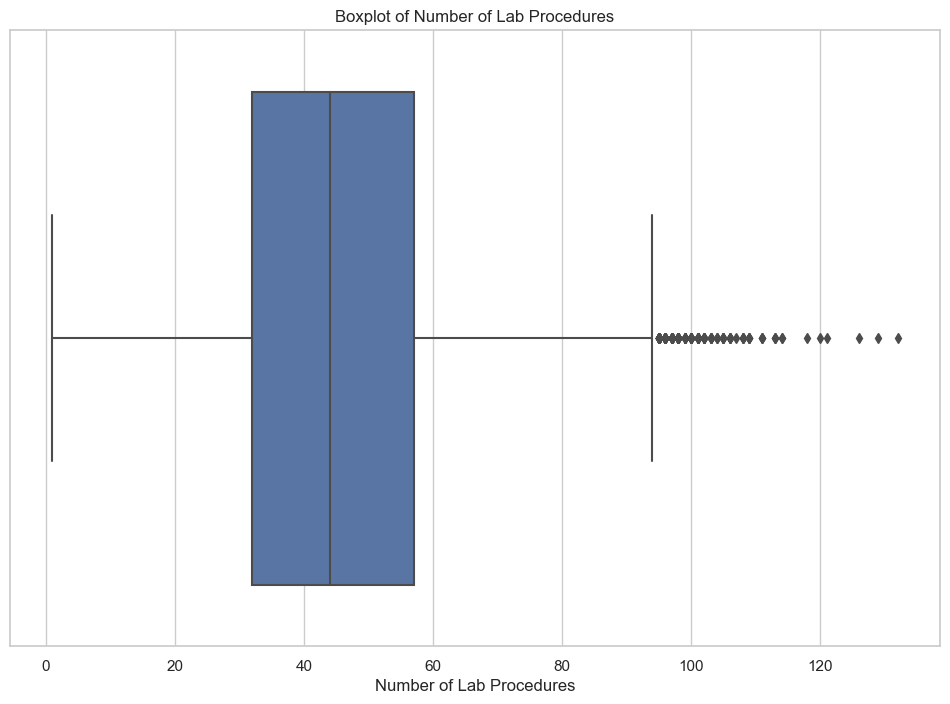

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['num_lab_procedures'])
plt.title('Boxplot of Number of Lab Procedures')
plt.xlabel('Number of Lab Procedures')
plt.show()

#### Number of medications

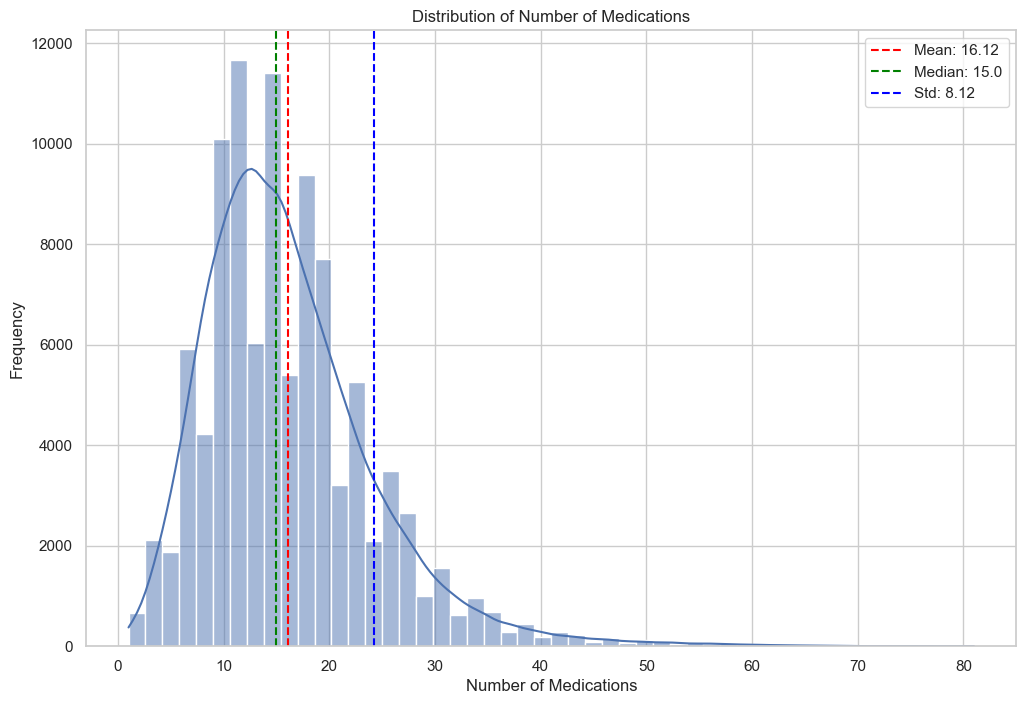

In [35]:
mean = df['num_medications'].mean()
median = df['num_medications'].median()
std = df['num_medications'].std()

plt.figure(figsize=(12, 8))
sns.histplot(df['num_medications'], bins=50, kde=True)
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='--', label=f'Median: {median}')
plt.axvline(mean + std, color='blue', linestyle='--', label=f'Std: {std:.2f}')
plt.title('Distribution of Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Frequency')
plt.legend()    
plt.show()

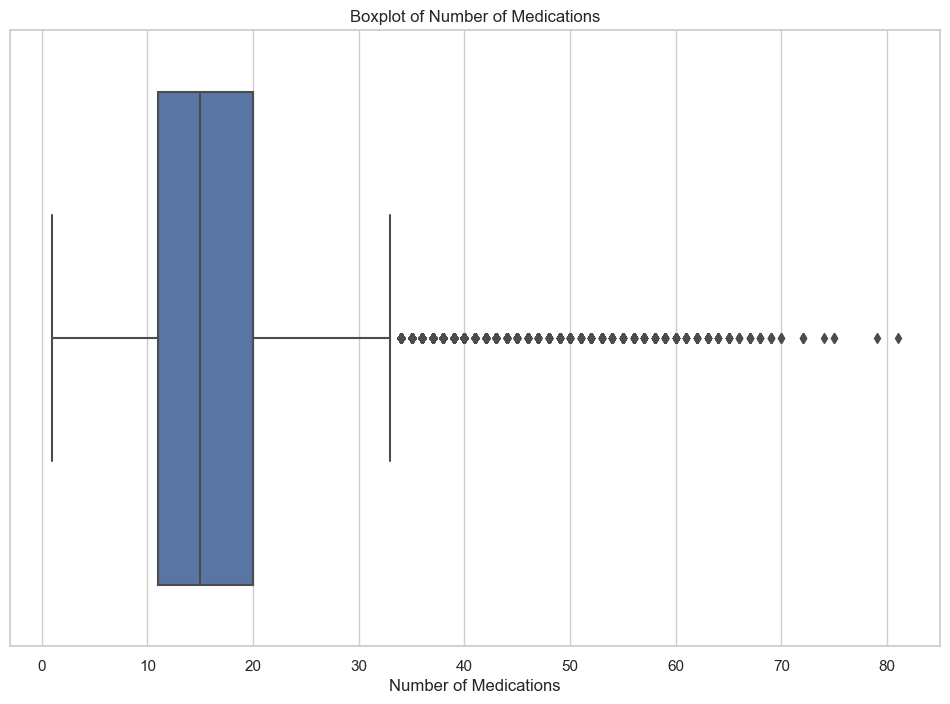

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['num_medications'])
plt.title('Boxplot of Number of Medications')
plt.xlabel('Number of Medications')
plt.show()

#### Readmitted Frequency

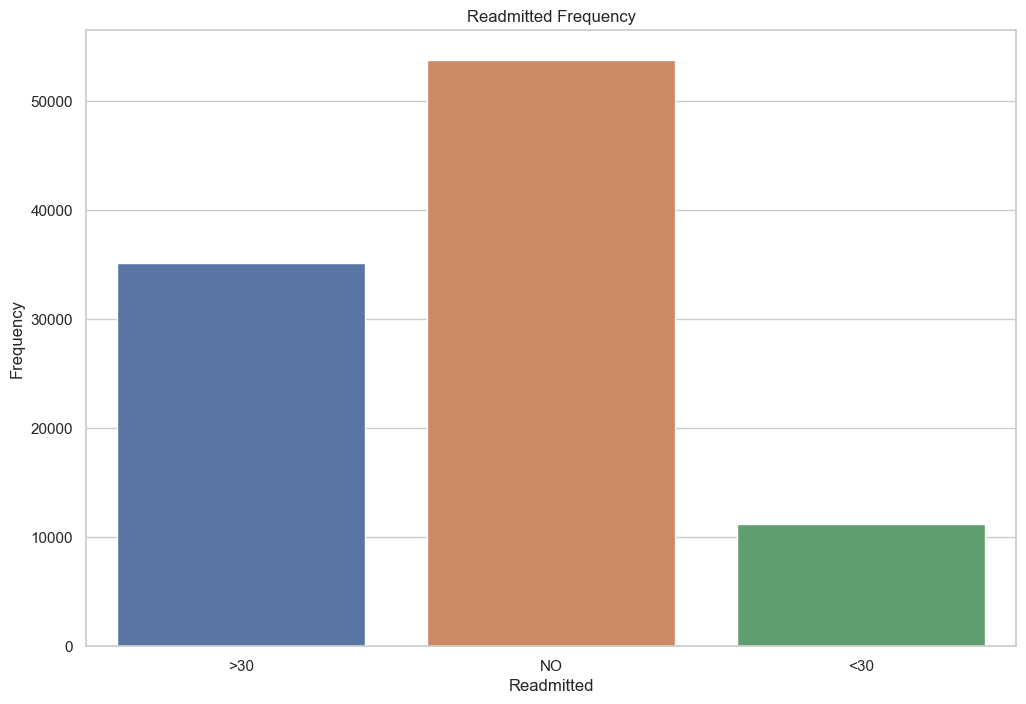

In [37]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df['readmitted'])
plt.title('Readmitted Frequency')
plt.xlabel('Readmitted')
plt.ylabel('Frequency')
plt.show()

#### Usage of medications

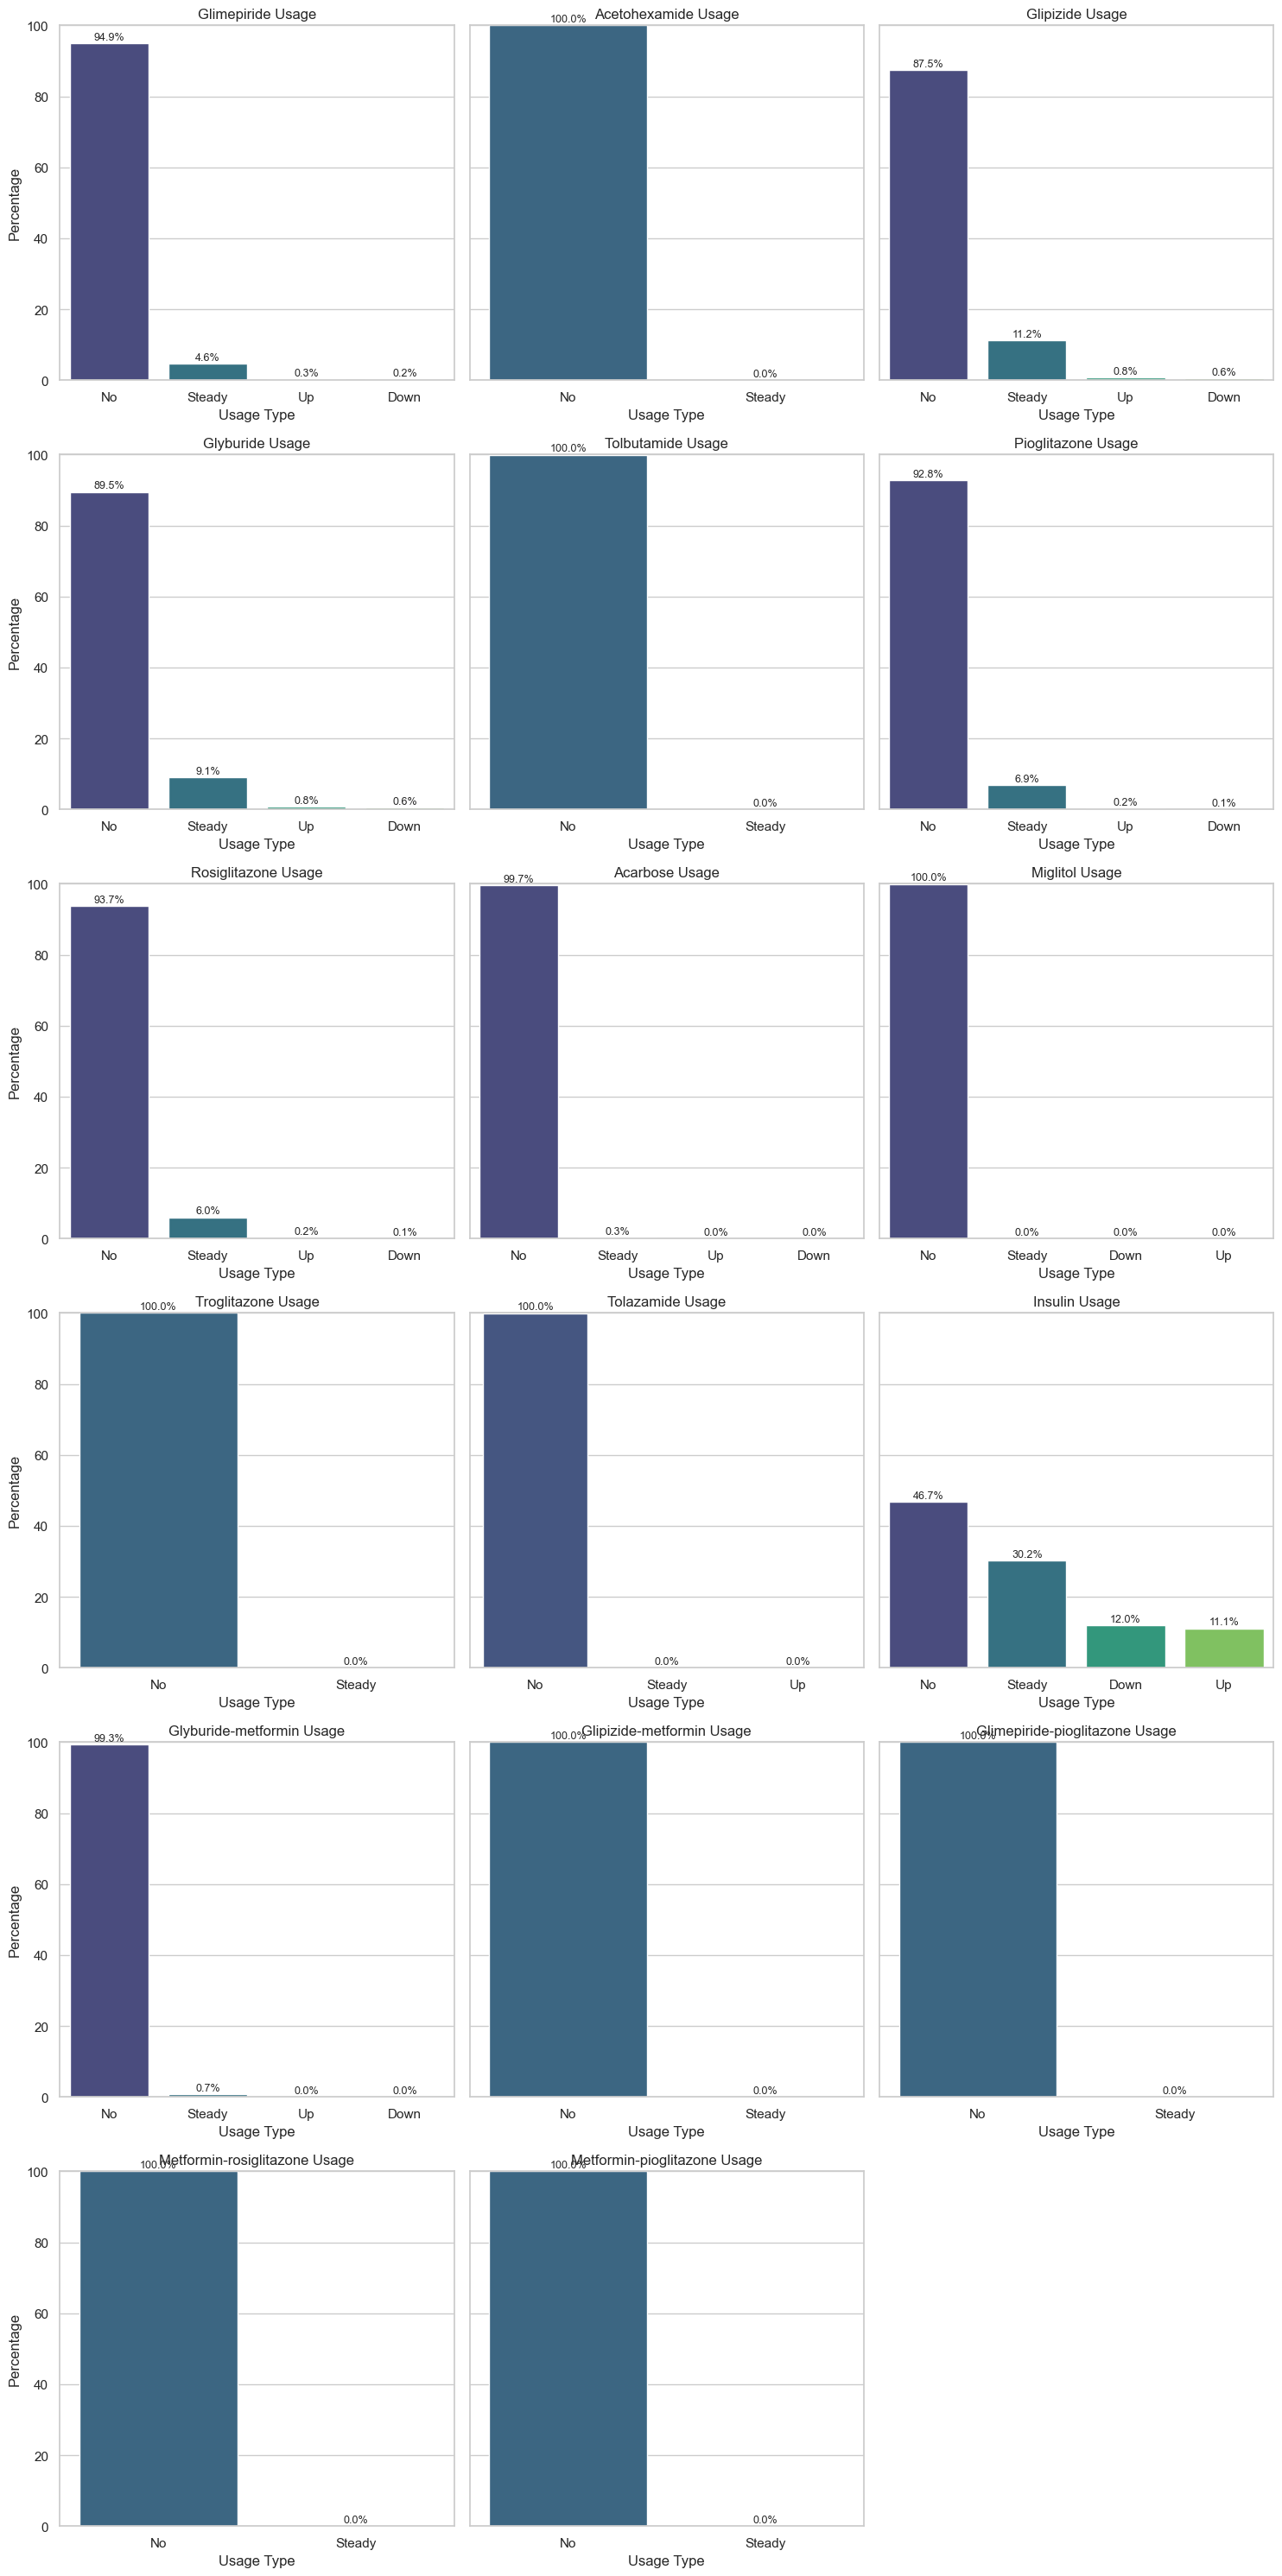

In [38]:
import math

medication_columns = ['glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

valid_medications = [med for med in medication_columns if len(df[med].unique()) > 1]

n_cols = 3
n_rows = math.ceil(len(valid_medications) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), sharey=True)
axes = axes.flatten()  # Flatten for easier indexing

# Iterate over valid medications and plot
for i, med in enumerate(valid_medications):
    usage_counts = df[med].value_counts(normalize=True) * 100  # Convert to percentages
    sns.barplot(ax=axes[i], x=usage_counts.index, y=usage_counts.values, palette="viridis")
    axes[i].set_title(f'{med.capitalize()} Usage')
    axes[i].set_xlabel('Usage Type')
    axes[i].set_ylabel('Percentage' if i % n_cols == 0 else '')  # Show ylabel only for the first column
    axes[i].set_ylim(0, 100)
    for j, v in enumerate(usage_counts.values):
        axes[i].text(j, v + 1, f'{v:.1f}%', ha='center', fontsize=9)

# Hide unused subplots
for j in range(len(valid_medications), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Correlation Matrix

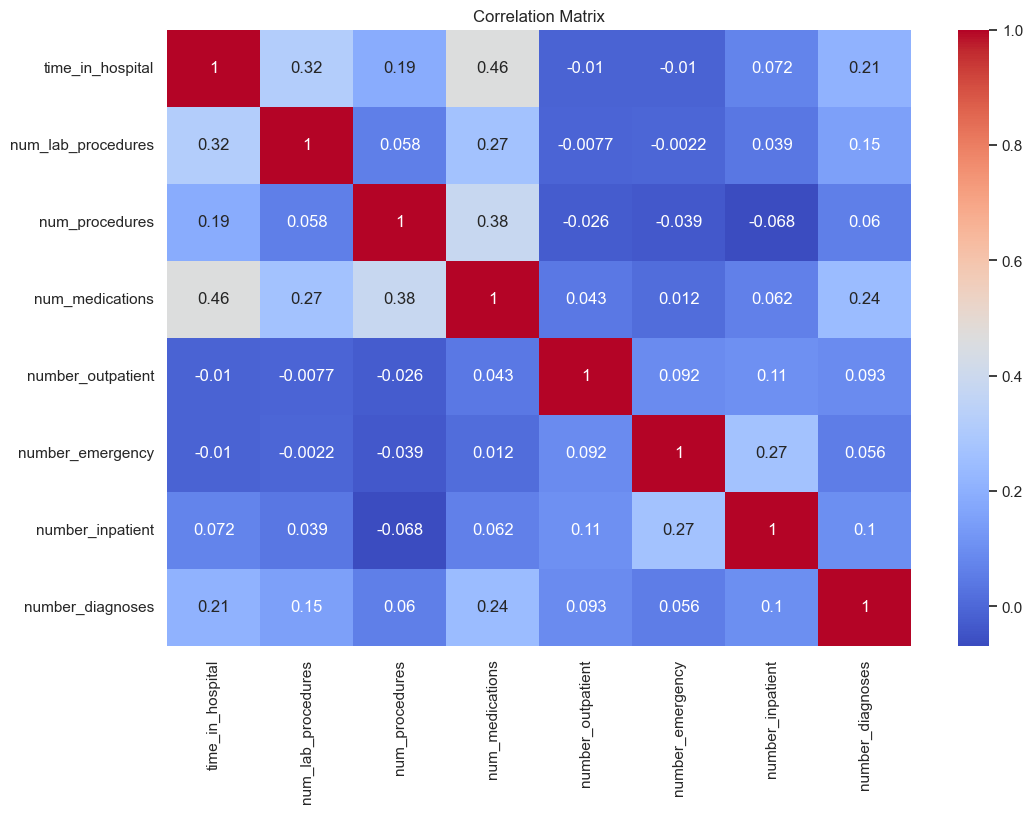

In [39]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.drop(columns=['encounter_id', 'patient_nbr'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Hospital stay vs. Readmission

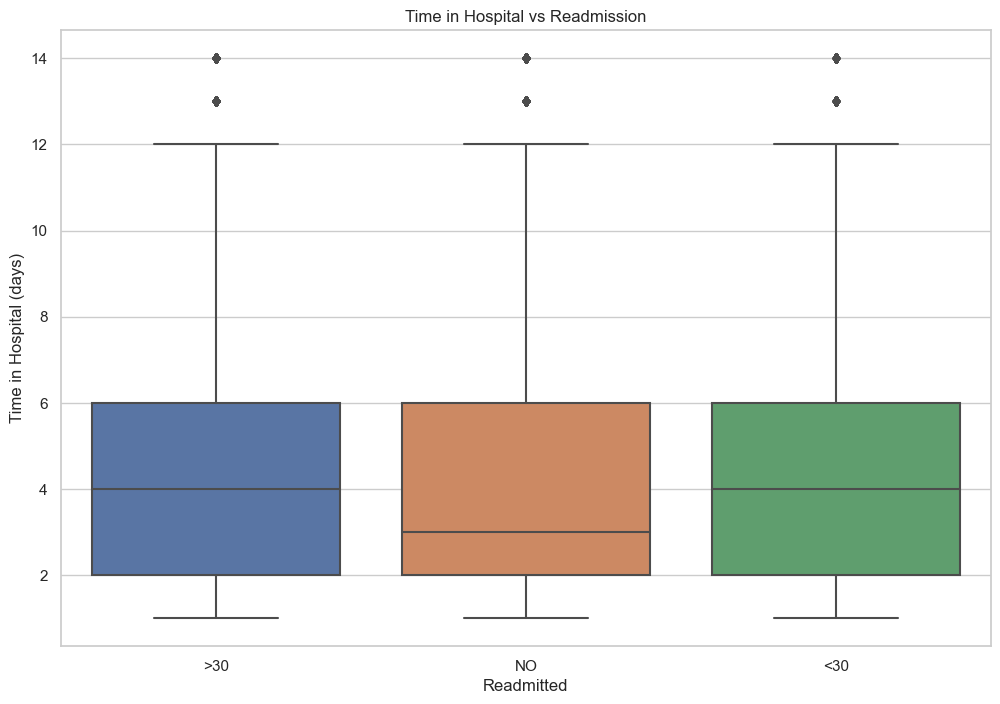

In [40]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
plt.title('Time in Hospital vs Readmission')
plt.xlabel('Readmitted')
plt.ylabel('Time in Hospital (days)')
plt.show()

#### Lab procedures vs. Race and Gender

In [41]:
# Group by race and calculate mean and median
race_summary = df.groupby('race')['num_lab_procedures'].agg(['mean', 'median']).reset_index()

# Group by gender and calculate mean and median
gender_summary = df.groupby('gender')['num_lab_procedures'].agg(['mean', 'median']).reset_index()

# Group by race and gender for combined analysis
race_gender_summary = df.groupby(['race', 'gender'])['num_lab_procedures'].agg(['mean', 'median']).reset_index()


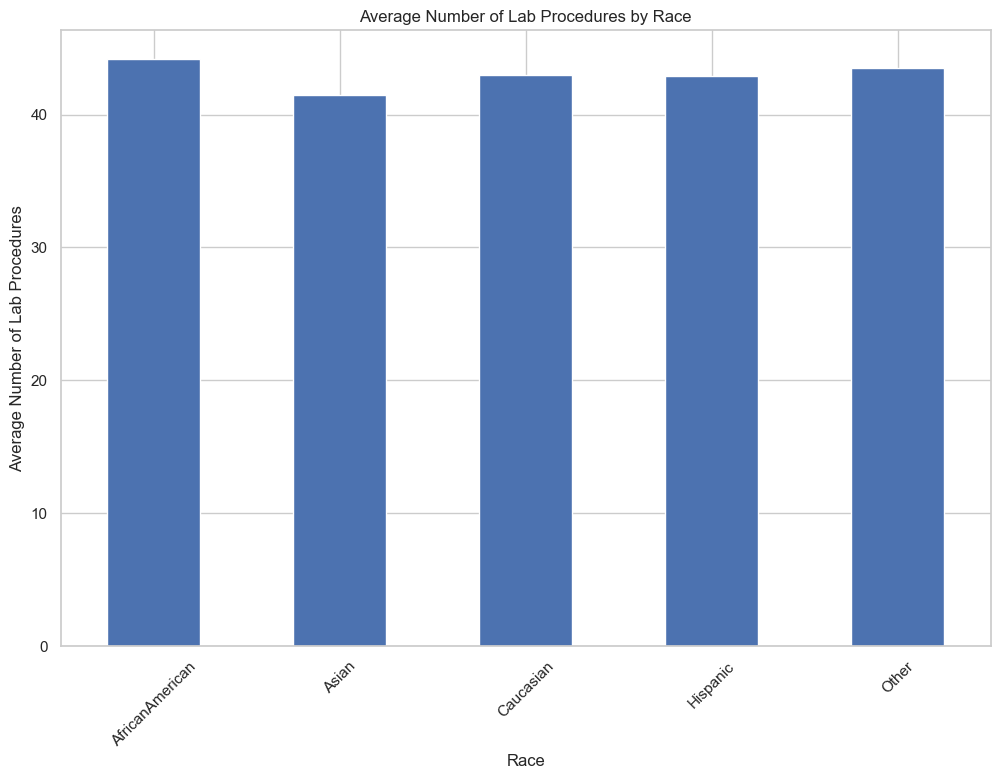

In [42]:
race_summary.plot(x='race', y='mean', kind='bar', legend=False, figsize=(12, 8))
plt.title('Average Number of Lab Procedures by Race')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.ylabel('Average Number of Lab Procedures')
plt.show()


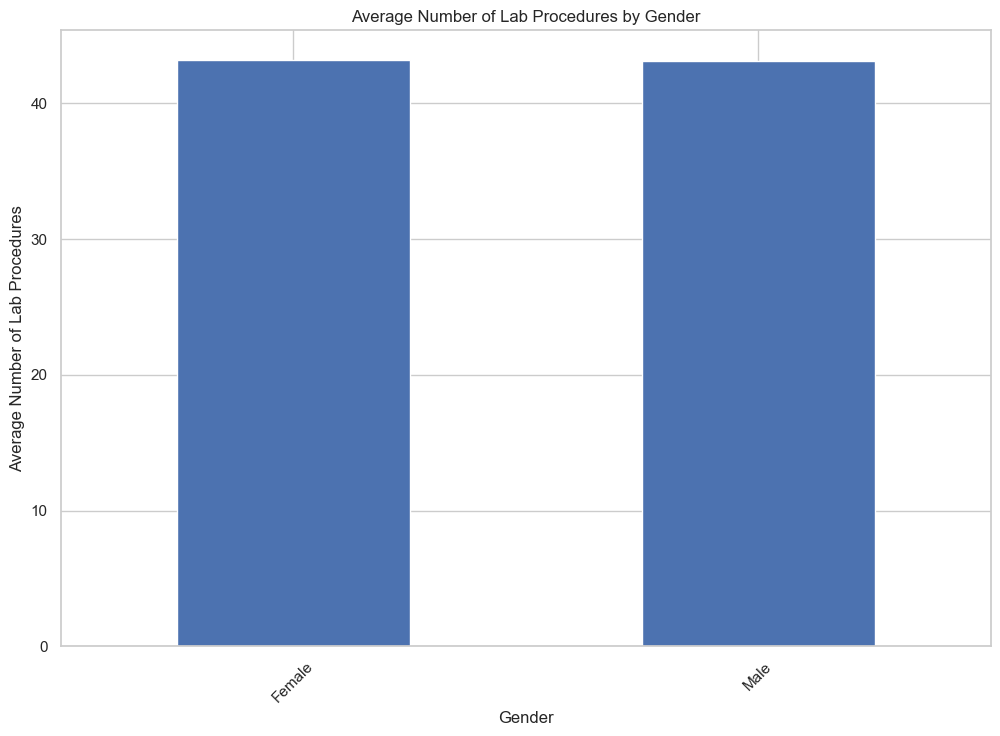

In [43]:
gender_summary.plot(x='gender', y='mean', kind='bar', legend=False, figsize=(12, 8))
plt.title('Average Number of Lab Procedures by Gender')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.ylabel('Average Number of Lab Procedures')
plt.show()

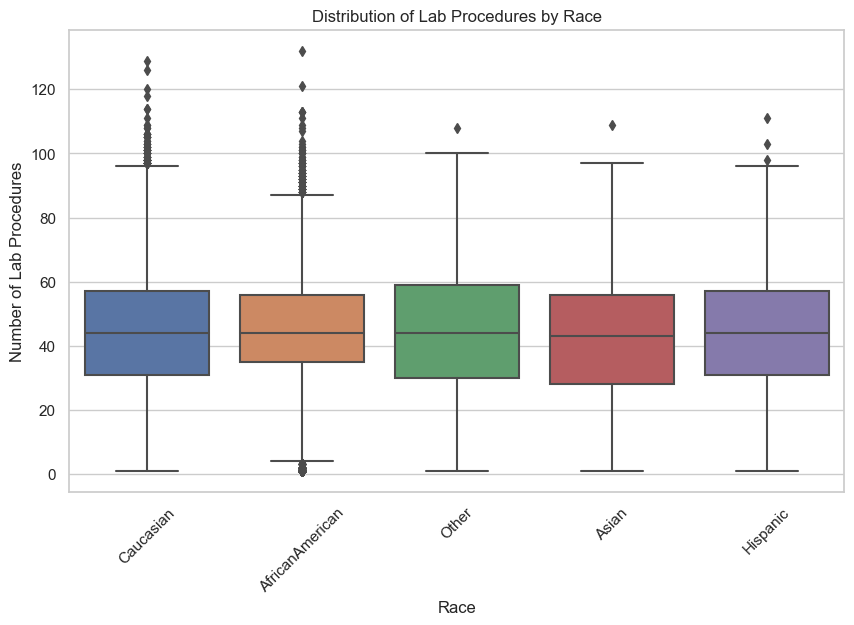

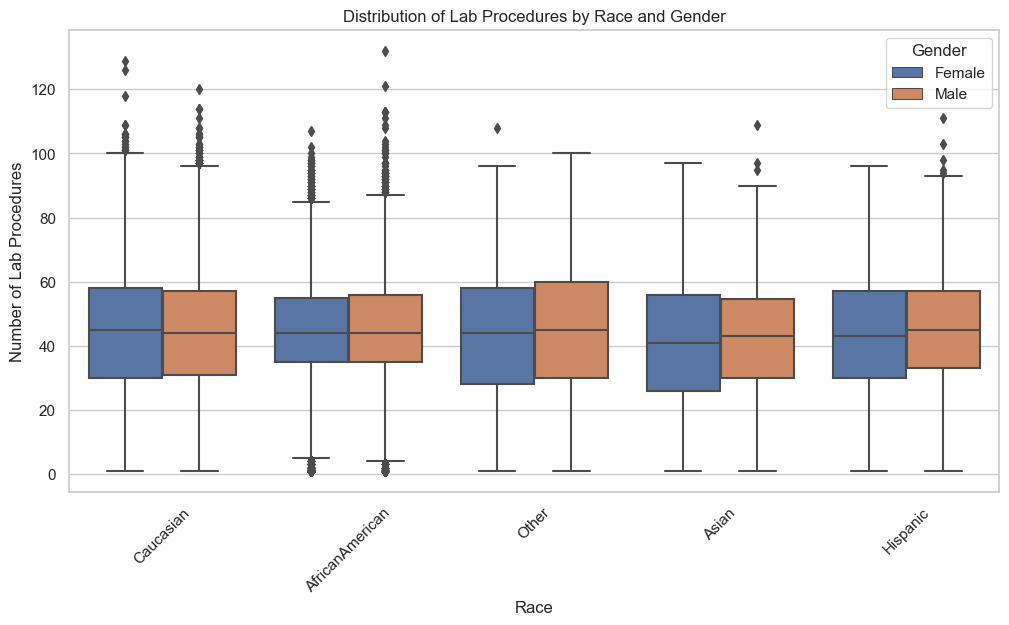

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='race', y='num_lab_procedures')
plt.title('Distribution of Lab Procedures by Race')
plt.xlabel('Race')
plt.ylabel('Number of Lab Procedures')
plt.xticks(rotation=45)
plt.show()

# Boxplot for race and gender combined
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='race', y='num_lab_procedures', hue='gender')
plt.title('Distribution of Lab Procedures by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Number of Lab Procedures')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

### Demographic Analysis

#### Age distribution

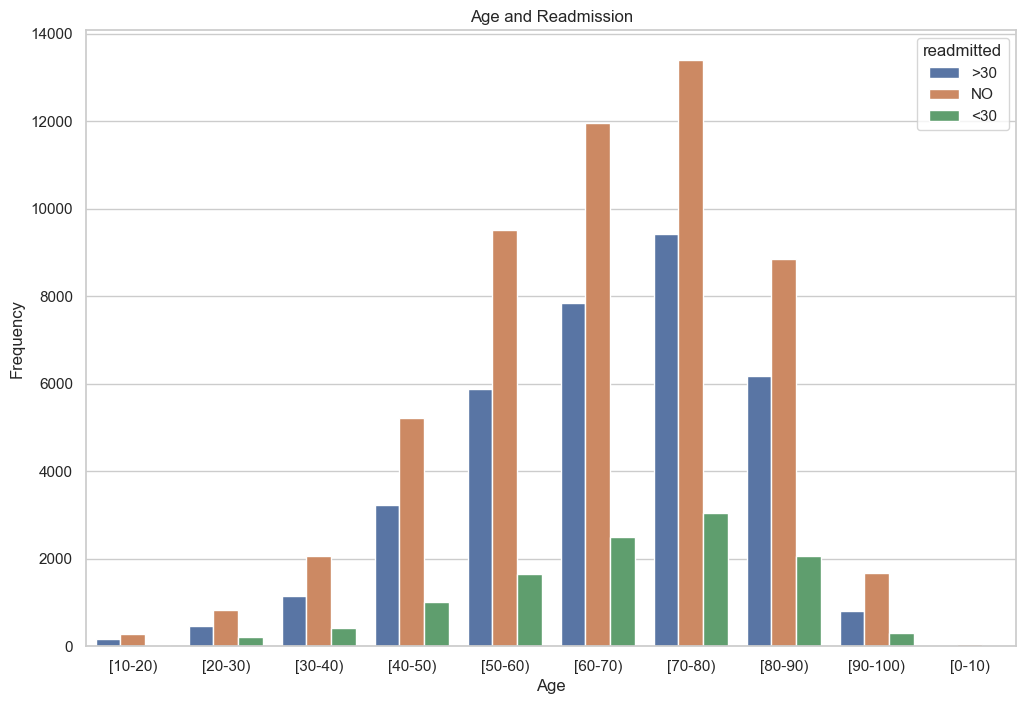

In [47]:
plt.figure(figsize=(12, 8))
sns.countplot(x='age', hue='readmitted', data=df)
plt.title('Age and Readmission')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Admission Types by Demographics

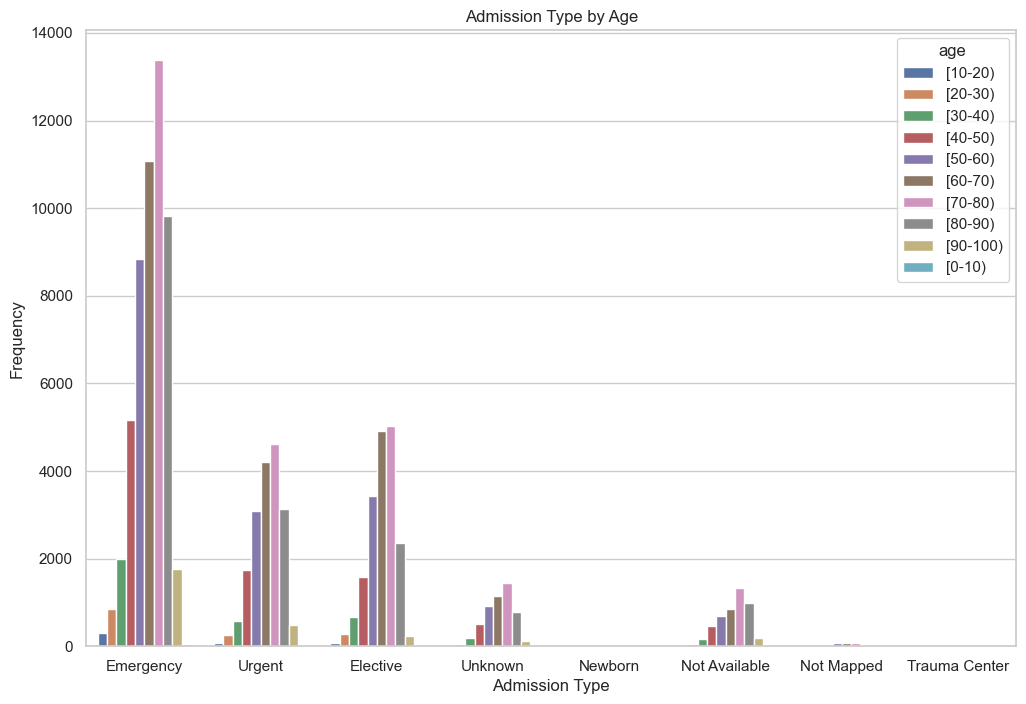

In [48]:
plt.figure(figsize=(12, 8))
sns.countplot(x='admission_type', hue='age', data=df)
plt.title('Admission Type by Age')
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.show()

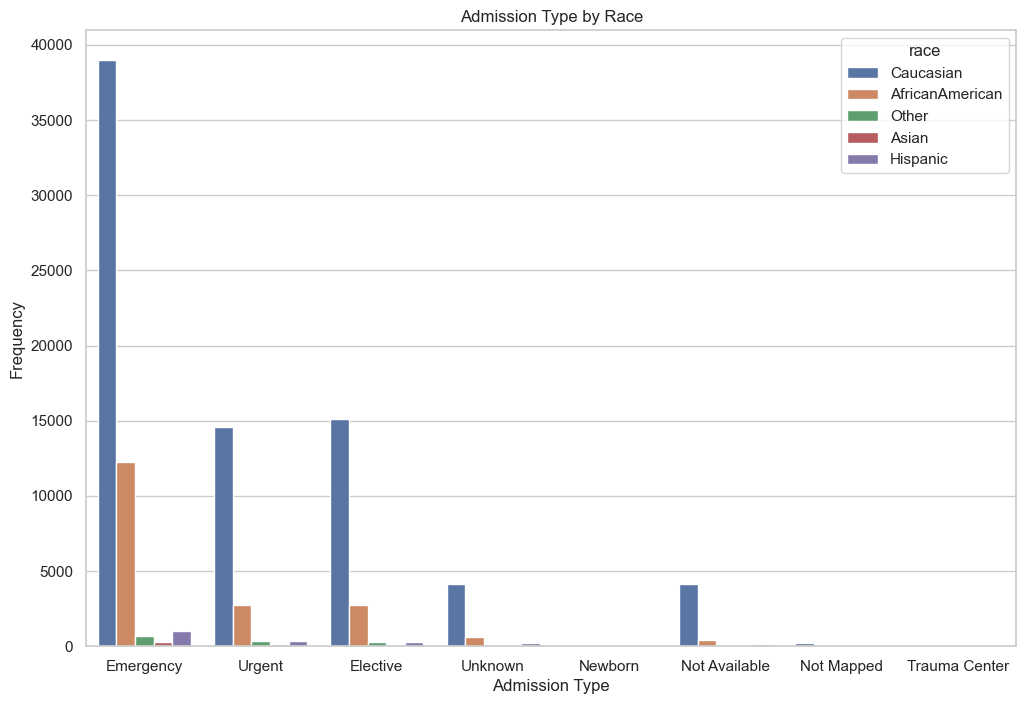

In [49]:
plt.figure(figsize=(12, 8))
sns.countplot(x='admission_type', hue='race', data=df)
plt.title('Admission Type by Race')
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.show()

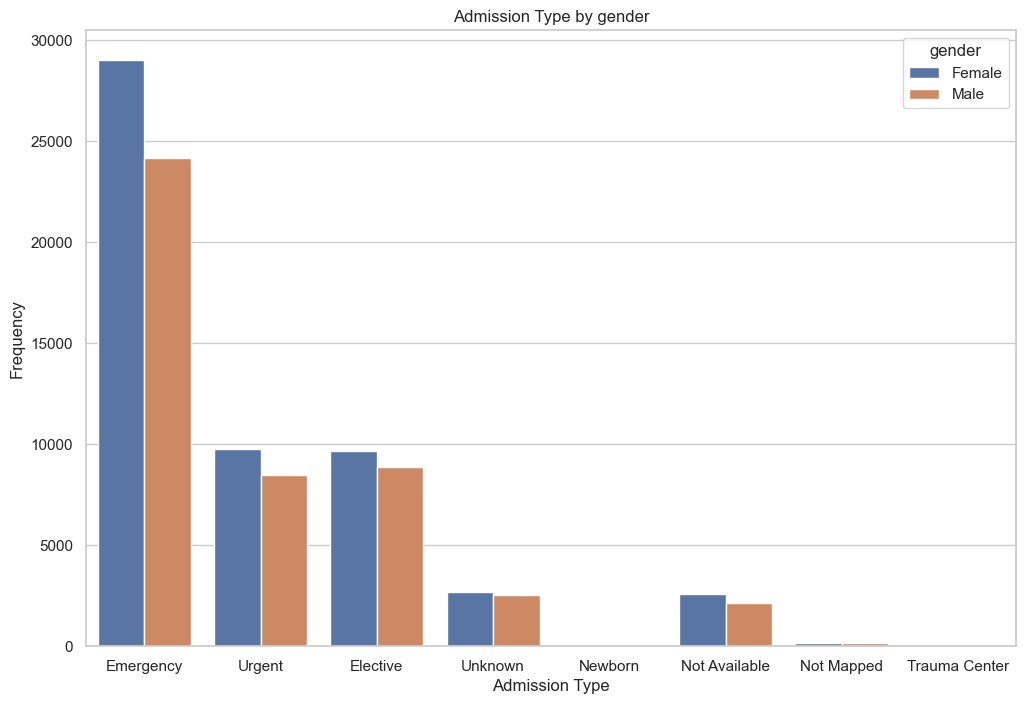

In [50]:
plt.figure(figsize=(12, 8))
sns.countplot(x='admission_type', hue='gender', data=df)
plt.title('Admission Type by gender')
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.show()

#### Discharge Disposition by Demographics

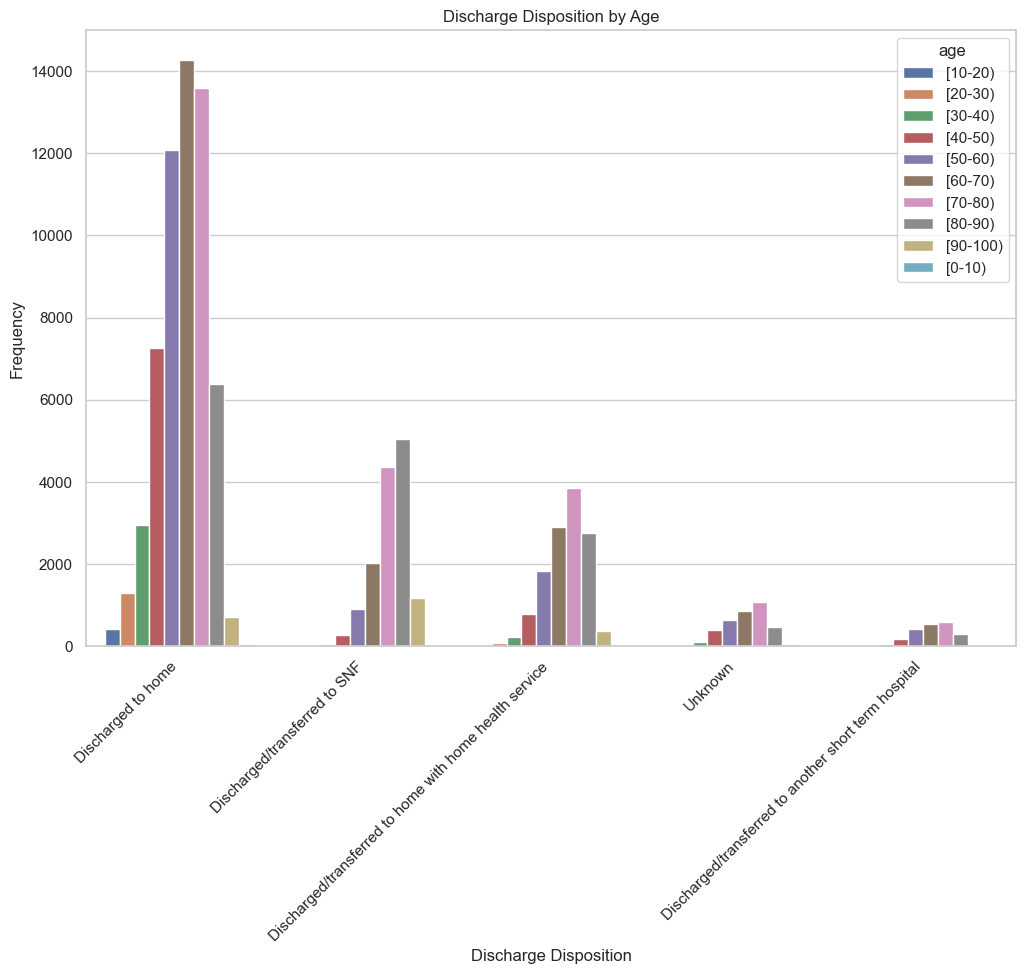

In [57]:
# shop only top 5 discharge dispositions
plt.figure(figsize=(12, 8))
sns.countplot(x='discharge_disposition', hue='age', data=df, order=df['discharge_disposition'].value_counts().index[:5])
plt.title('Discharge Disposition by Age')
plt.xlabel('Discharge Disposition')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()

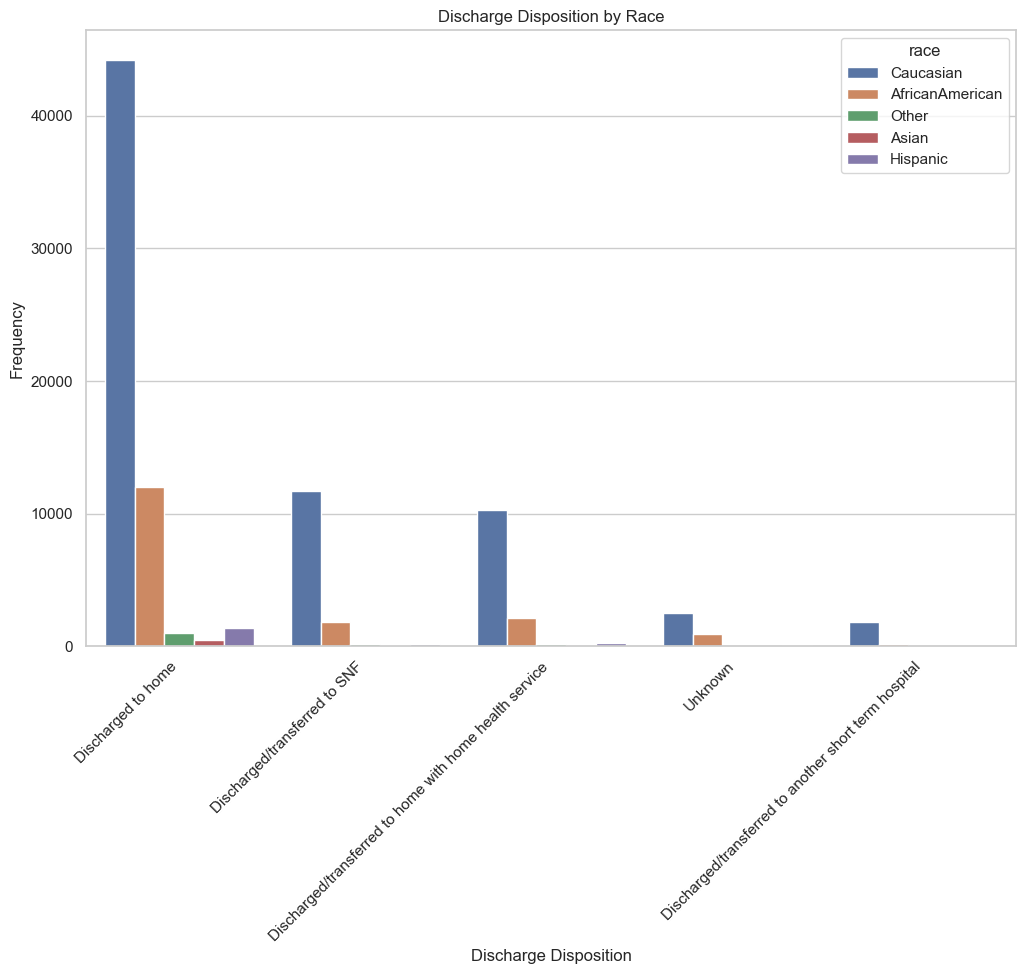

In [58]:
plt.figure(figsize=(12, 8))
sns.countplot(x='discharge_disposition', hue='race', data=df, order=df['discharge_disposition'].value_counts().index[:5])
plt.title('Discharge Disposition by Race')
plt.xlabel('Discharge Disposition')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()

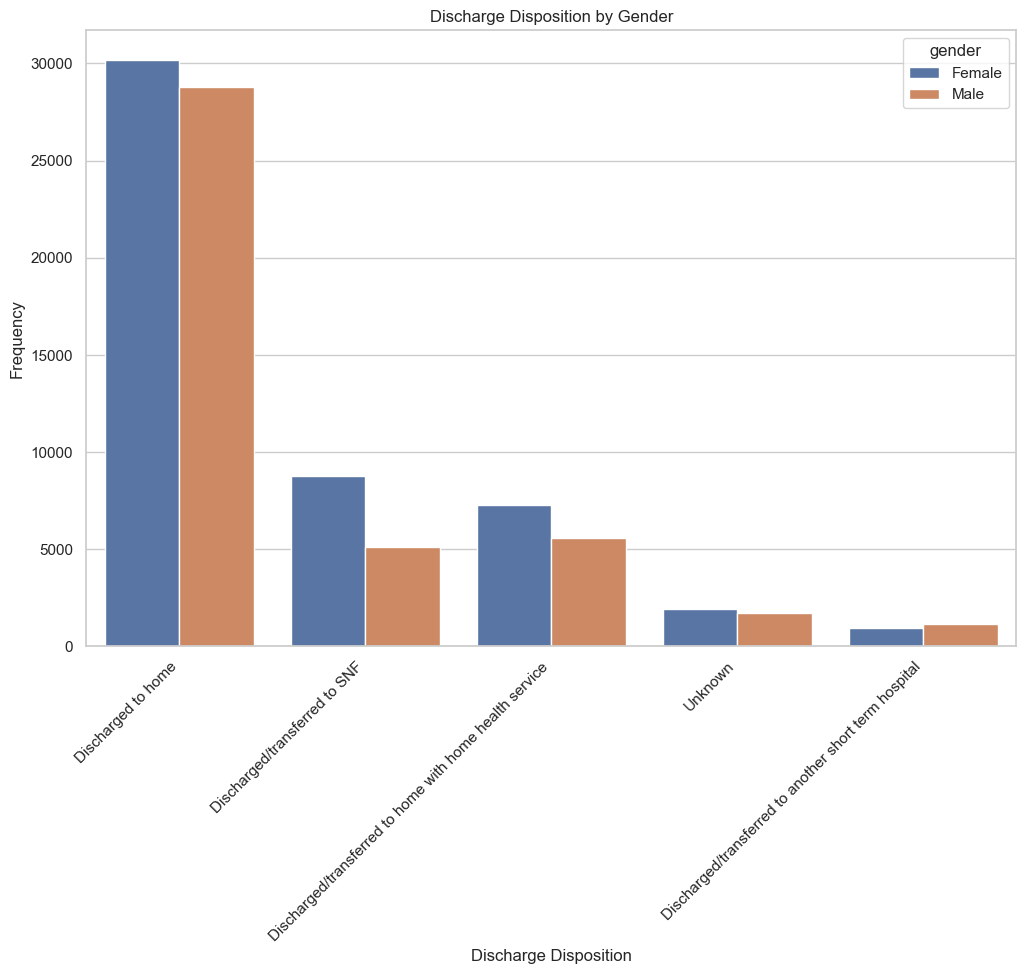

In [59]:
plt.figure(figsize=(12, 8))
sns.countplot(x='discharge_disposition', hue='gender', data=df, order=df['discharge_disposition'].value_counts().index[:5])
plt.title('Discharge Disposition by Gender')
plt.xlabel('Discharge Disposition')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()

### Target Variable Analysis

#### Propotion of Readmission

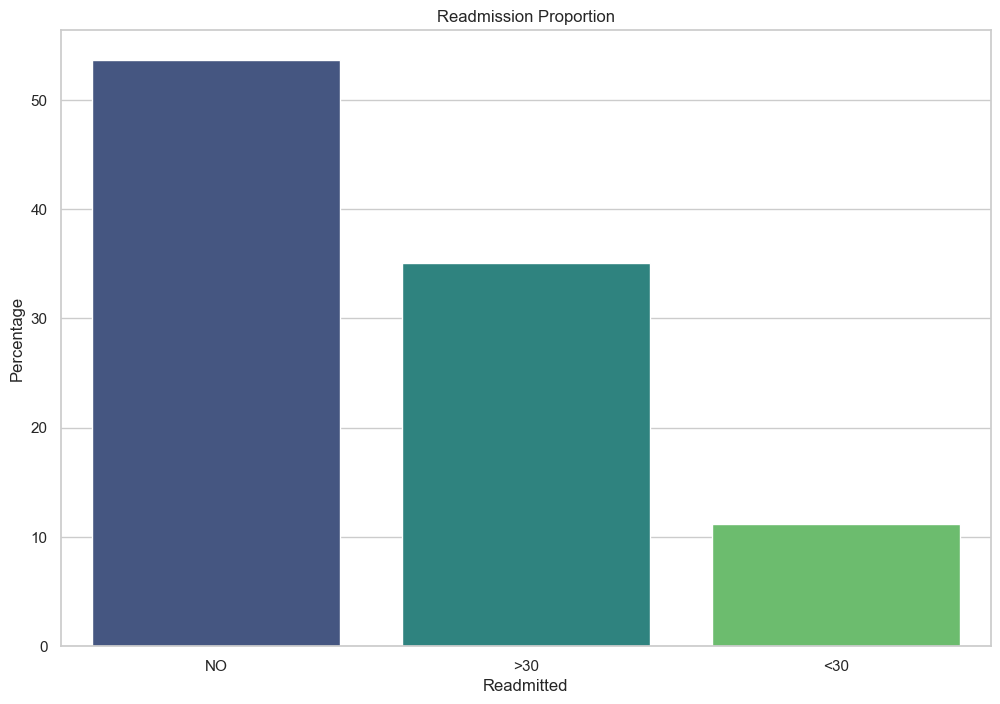

In [60]:
readmitted_counts = df['readmitted'].value_counts(normalize=True) * 100
plt.figure(figsize=(12, 8))
sns.barplot(x=readmitted_counts.index, y=readmitted_counts.values, palette='viridis')
plt.title('Readmission Proportion')
plt.xlabel('Readmitted')
plt.ylabel('Percentage')
plt.show()

#### Relationship between Readmission and time in hospital

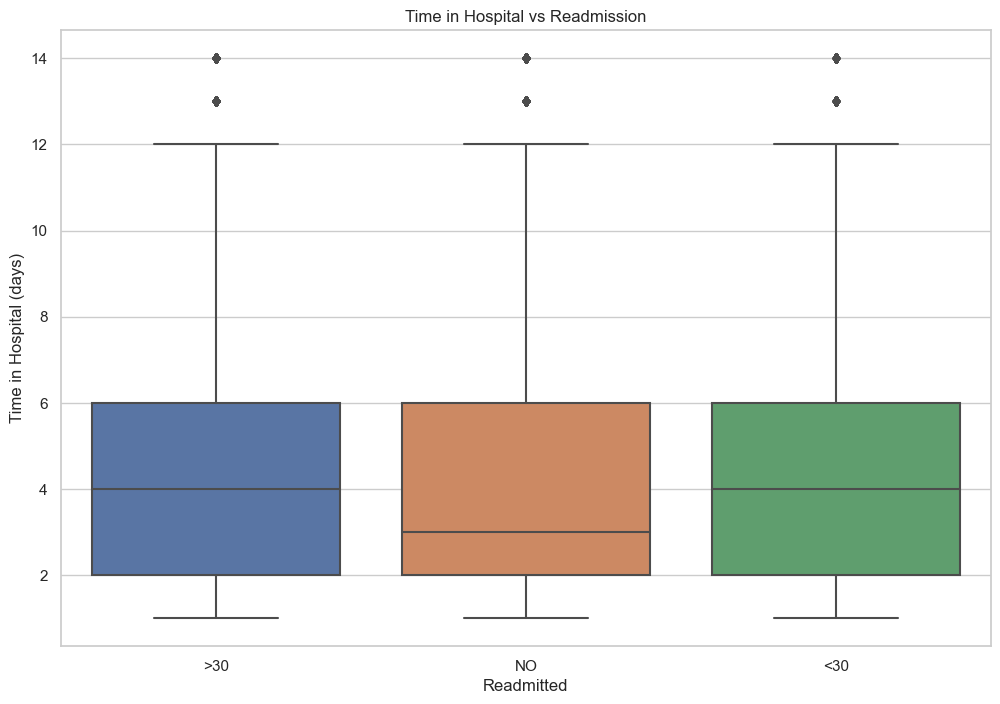

In [61]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
plt.title('Time in Hospital vs Readmission')
plt.xlabel('Readmitted')
plt.ylabel('Time in Hospital (days)')
plt.show()

#### Distribution of time in hospital

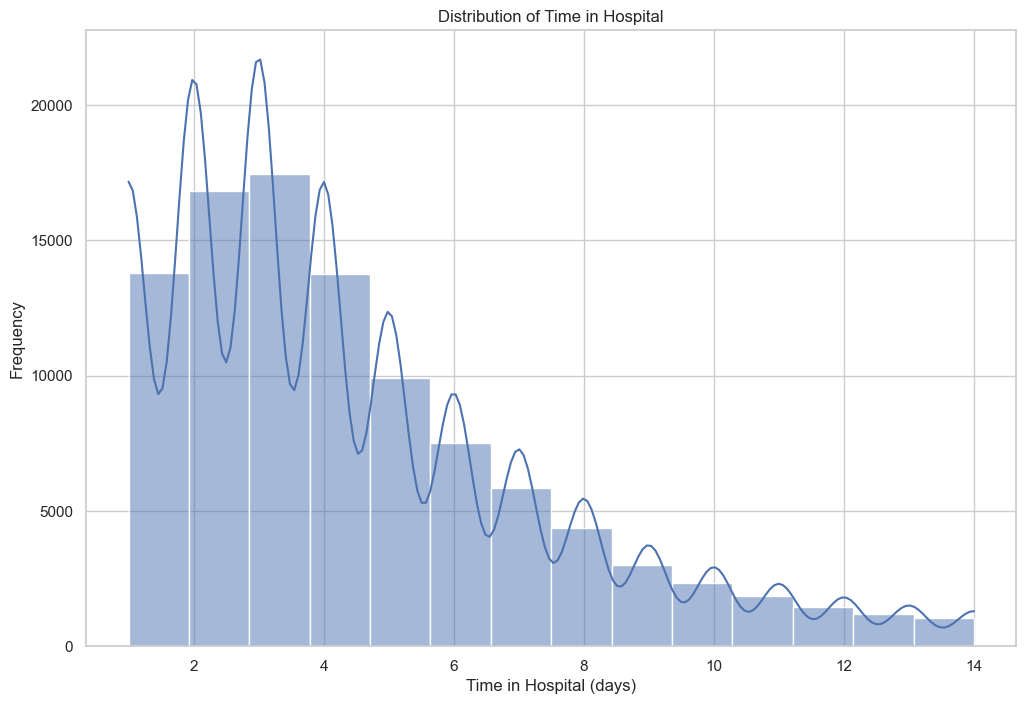

In [64]:
plt.figure(figsize=(12, 8))
sns.histplot(df['time_in_hospital'], bins=14, kde=True)
plt.title('Distribution of Time in Hospital')
plt.xlabel('Time in Hospital (days)')
plt.ylabel('Frequency')
plt.show()

#### Mean and median time in hospital for readmitted patients

In [65]:
readmitted_summary = df.groupby('readmitted')['time_in_hospital'].agg(['mean', 'median'])
readmitted_summary

,mean,median
readmitted,,
<30,4.783200,4.0
>30,4.512325,4.0
NO,4.284310,3.0


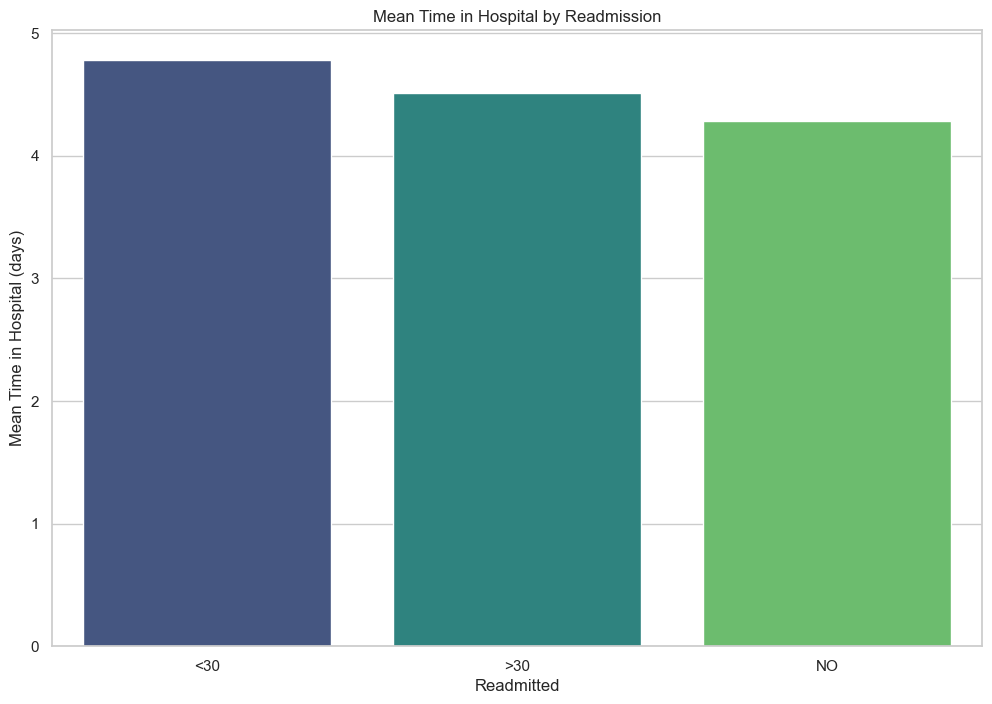

In [68]:
plt.figure(figsize=(12, 8))
sns.barplot(x=readmitted_summary.index, y=readmitted_summary['mean'], palette='viridis')
plt.title('Mean Time in Hospital by Readmission')
plt.xlabel('Readmitted')
plt.ylabel('Mean Time in Hospital (days)')
plt.show()